In [27]:
import pandas as pd
import os 
import numpy as np
from evo.tools.plot import *

import matplotlib.pyplot as plt
from tools.internal.plot_settings import get_figsize

%matplotlib widget

result_figure_dir = "/mnt/c/Users/J-Dau/OneDrive/TUM/04_SS23/02_MA/02_Figures/06_ch-4-project-context/"

In [2]:
csv_path = "/mnt/c/Users/J-Dau/OneDrive/TUM/04_SS23/02_MA/03_CSVs"
li = []
for file in os.listdir(csv_path):
    fpath = os.path.join(csv_path, file)
    if os.path.exists(fpath) and os.path.isfile(fpath):
        df = pd.read_csv(fpath)
        li.append(df)
      
df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
def extract(df, topic):
    new_df = df.loc[df['topic'] == topic]
    arr = new_df[["receive time", "value"]].to_numpy()
    arr[:,0] -= arr[0,0]
    return arr

hor_vel = extract(df, "/edgar/sensor/gps/novatel/bestvel.hor_speed")
trk_gnd = extract(df, "/edgar/sensor/gps/novatel/bestvel.trk_gnd")
dualantenna = extract(df, "/edgar/sensor/gps/novatel/dualantennaheading.heading")
gps_track = extract(df, "/edgar/sensor/gps/novatel/gps.track")
heading2 = extract(df, "/edgar/sensor/gps/novatel/heading2.heading")


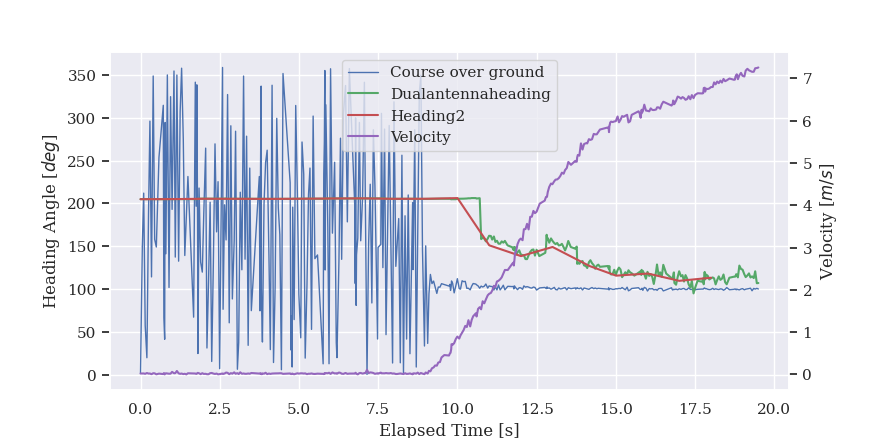

In [38]:
plt.close('all')
fig = plt.figure(figsize=get_figsize(wf=1.5,hf = 0.5))
ax1 = fig.gca()

ax1.plot(trk_gnd[:,0], trk_gnd[:,1], label='Course over ground', linewidth=1.0)
ax1.plot(dualantenna[:,0], dualantenna[:,1], label='Dualantennaheading', linewidth=1.5)
ax1.plot(heading2[:,0], heading2[:,1], label='Heading2',linewidth=1.5)

# Set labels and title for the left y-axis
ax1.set_xlabel('Elapsed Time [s]')
ax1.set_ylabel('Heading Angle [$deg$]')
# ax1.tick_params(axis='y', labelcolor='black')


# Create a second y-axis on the right
ax2 = ax1.twinx()
ax2.grid(False)

# # Plot hor_vel on the right y-axis
ax2.plot(hor_vel[:,0], hor_vel[:,1], label='Velocity', color="tab:purple" ,linewidth=1.5, linestyle="-")

# # Set labels and title for the right y-axis
ax2.set_ylabel("Velocity [$m/s$]")

# # Combine legends into a single legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center')

# # Limit x-axis to zero
# ax1.set_xlim(left=0)

plt.show()
plt.savefig(os.path.join(result_figure_dir, "heading-angles.pdf"), format="pdf", bbox_inches="tight")

In [ ]:
df